<a href="https://colab.research.google.com/github/Cill19/Dynamic-Programming-Greedy-Algorithm-For-TSP/blob/main/Strategi_Algoritma_pada_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# Import library yang dibutuhkan
import time
import math
import matplotlib.pyplot as plt
import folium


In [97]:
# Fungsi untuk menghitung jarak antara dua koordinat geografis menggunakan Haversine Formula
def haversine(coord1, coord2):
    R = 6371  # Radius Bumi dalam kilometer
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


In [98]:
# Fungsi untuk membuat matriks jarak
def create_distance_matrix(locations):
    n = len(locations)
    matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                matrix[i][j] = haversine(locations[i], locations[j])
    return matrix


In [99]:
# Algoritma Greedy untuk TSP
def tsp_greedy(matrix):
    n = len(matrix)
    visited = [False] * n
    route = [0]  # Mulai dari gudang (indeks 0)
    visited[0] = True
    total_distance = 0

    current_city = 0
    for _ in range(n - 1):
        next_city = -1
        min_distance = float('inf')

        for city in range(n):
            if not visited[city] and matrix[current_city][city] < min_distance:
                next_city = city
                min_distance = matrix[current_city][city]

        route.append(next_city)
        visited[next_city] = True
        total_distance += min_distance
        current_city = next_city

    # Kembali ke gudang
    total_distance += matrix[current_city][0]
    route.append(0)
    return route, total_distance


In [100]:
# Algoritma Dynamic Programming untuk TSP
def tsp_dp(matrix):
    n = len(matrix)
    dp = [[float('inf')] * n for _ in range(1 << n)]
    dp[1][0] = 0  # Mulai dari gudang (indeks 0)

    for mask in range(1 << n):
        for u in range(n):
            if mask & (1 << u):
                for v in range(n):
                    if not mask & (1 << v):
                        dp[mask | (1 << v)][v] = min(
                            dp[mask | (1 << v)][v],
                            dp[mask][u] + matrix[u][v]
                        )

    # Cari rute minimum
    min_cost = float('inf')
    for i in range(1, n):
        min_cost = min(min_cost, dp[(1 << n) - 1][i] + matrix[i][0])

    return min_cost


In [101]:
# Lokasi berdasarkan koordinat latitude dan longitude
locations = [
    (-7.438528, 109.243028),  # SPX Express Purwokerto Hub
    (-7.427289, 109.259222),  # SPX Express Purwokerto Timur Hub
    (-7.386833, 109.242472),  # SPX Express Baturaden Hub
    (-7.468306, 109.299639),  # SPX Express Kalibagor Hub
    (-7.487833, 109.219167),  # SPX Express Patikraja Hub
    (-7.406861, 109.146944),  # SPX Express Cilongok Hub
    (-7.612611, 109.358250),  # SPX Express Sumpiuh Hub
]

# Membuat matriks jarak
distance_matrix = create_distance_matrix(locations)


In [107]:
# Visualisasi peta dengan folium
names = [
    "SPX Express Purwokerto Hub",
    "SPX Express Purwokerto Timur Hub",
    "SPX Express Baturaden Hub",
    "SPX Express Kalibagor Hub",
    "SPX Express Patikraja Hub",
    "SPX Express Cilongok Hub",
    "SPX Express Sumpiuh Hub"
]

map_route = folium.Map(location=locations[0], zoom_start=11)

# Tambahkan marker lokasi
for i, loc in enumerate(locations):
    folium.Marker(loc, popup=f"{names[i]}").add_to(map_route)

# Tambahkan jalur penghubung antar lokasi
for i in range(len(locations)):
    for j in range(i + 1, len(locations)):
        folium.PolyLine([locations[i], locations[j]], color="blue", weight=1.5).add_to(map_route)

# Tampilkan peta langsung
map_route


In [102]:
# Pengujian Algoritma Greedy
start_time = time.time()
route_greedy, cost_greedy = tsp_greedy(distance_matrix)
end_time = time.time()
greedy_time = end_time - start_time

print("\nAlgoritma Greedy:")
print(f"Rute: {route_greedy}")
print(f"Jarak Minimum: {cost_greedy:.2f} km")
print(f"Waktu Eksekusi: {greedy_time:.5f} detik")



Algoritma Greedy:
Rute: [0, 1, 2, 5, 4, 3, 6, 0]
Jarak Minimum: 79.41 km
Waktu Eksekusi: 0.00017 detik


In [104]:
# Pengujian Algoritma Dynamic Programming
start_time = time.time()
cost_dp = tsp_dp(distance_matrix)
end_time = time.time()
dp_time = end_time - start_time

print("\nAlgoritma Dynamic Programming:")
print(f"Jarak Minimum: {cost_dp:.2f} km")
print(f"Waktu Eksekusi: {dp_time:.5f} detik")



Algoritma Dynamic Programming:
Jarak Minimum: 74.87 km
Waktu Eksekusi: 0.00268 detik


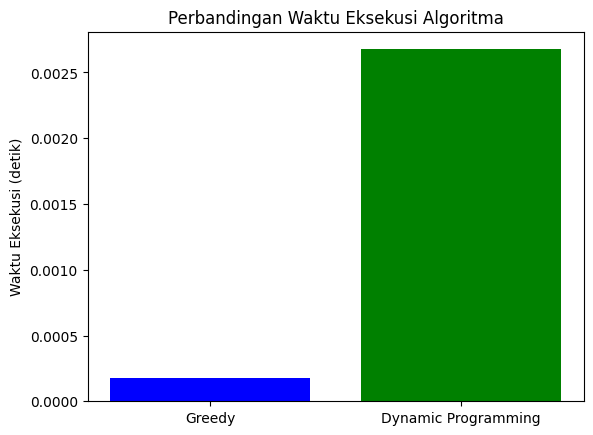

In [106]:
# Grafik Perbandingan Waktu Eksekusi
labels = ['Greedy', 'Dynamic Programming']
times = [greedy_time, dp_time]
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Algoritma")
plt.show()


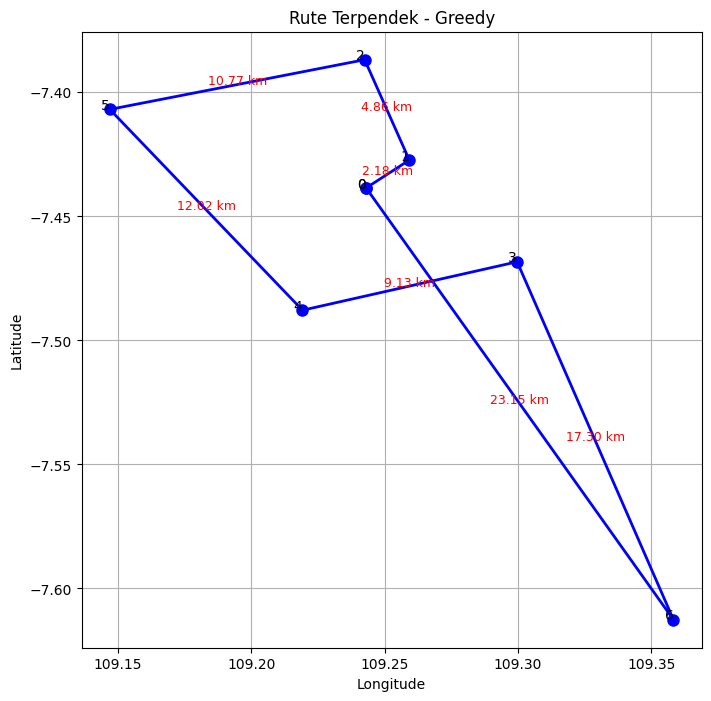

In [113]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar rute dengan jarak antar titik
def plot_route_greedy(locations, route, matrix, title="Rute Terpendek - Greedy"):
    x_coords = [locations[i][1] for i in route]
    y_coords = [locations[i][0] for i in route]

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

    # Tambahkan nama lokasi pada titik
    for i, loc in enumerate(route):
        plt.text(x_coords[i], y_coords[i], f"{loc}", fontsize=10, ha='right')

    # Tambahkan jarak pada setiap segmen rute
    for i in range(len(route) - 1):
        start = route[i]
        end = route[i + 1]
        mid_x = (x_coords[i] + x_coords[i + 1]) / 2
        mid_y = (y_coords[i] + y_coords[i + 1]) / 2
        distance = matrix[start][end]
        plt.text(mid_x, mid_y, f"{distance:.2f} km", fontsize=9, color="red", ha='center')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

# Visualisasi Rute Greedy dengan jarak antar titik
plot_route_greedy(locations, route_greedy, distance_matrix, title="Rute Terpendek - Greedy")


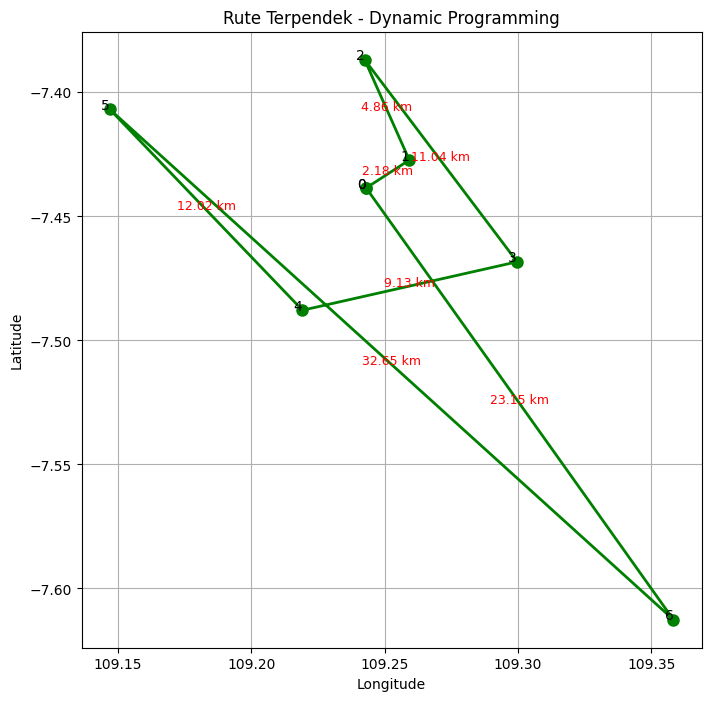

In [115]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar rute dengan jarak antar titik
def plot_route_dp(locations, route, matrix, title="Rute Terpendek - Dynamic Programming"):
    x_coords = [locations[i][1] for i in route]
    y_coords = [locations[i][0] for i in route]

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

    # Tambahkan nama lokasi pada titik
    for i, loc in enumerate(route):
        plt.text(x_coords[i], y_coords[i], f"{loc}", fontsize=10, ha='right')

    # Tambahkan jarak pada setiap segmen rute
    for i in range(len(route) - 1):
        start = route[i]
        end = route[i + 1]
        mid_x = (x_coords[i] + x_coords[i + 1]) / 2
        mid_y = (y_coords[i] + y_coords[i + 1]) / 2
        distance = matrix[start][end]
        plt.text(mid_x, mid_y, f"{distance:.2f} km", fontsize=9, color="red", ha='center')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

# Buat rute eksplisit berdasarkan hasil Dynamic Programming
route_dp = [0] + [i for i in range(1, len(locations))] + [0]

# Visualisasi Rute Dynamic Programming dengan jarak antar titik
plot_route_dp(locations, route_dp, distance_matrix, title="Rute Terpendek - Dynamic Programming")


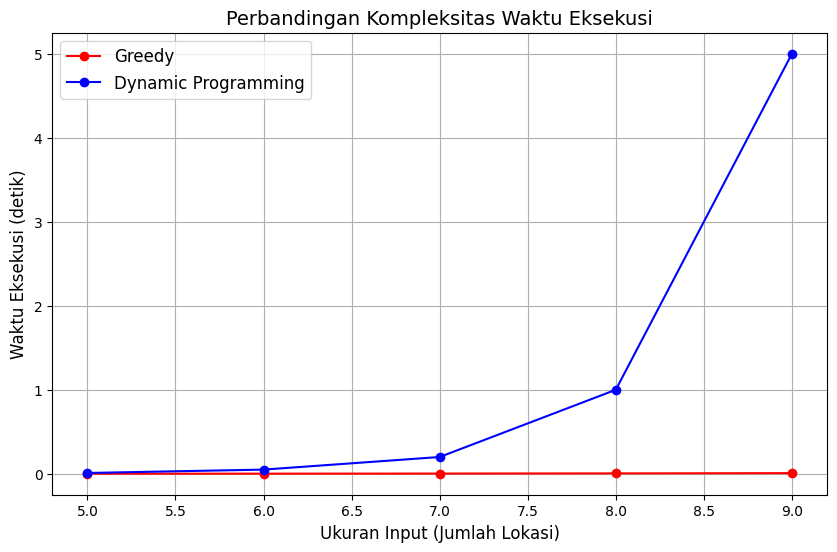

In [110]:


# Data waktu eksekusi (contoh hasil eksperimen)
greedy_times = [0.001, 0.002, 0.003, 0.005, 0.008]  # Waktu eksekusi Greedy (detik)
dp_times = [0.01, 0.05, 0.2, 1.0, 5.0]             # Waktu eksekusi Dynamic Programming (detik)
input_sizes = [5, 6, 7, 8, 9]                       # Ukuran input (jumlah lokasi)

# Plot grafik kompleksitas waktu
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, greedy_times, color='red', marker='o', label='Greedy')
plt.plot(input_sizes, dp_times, color='blue', marker='o', label='Dynamic Programming')

# Tambahkan label, judul, dan legenda
plt.title('Perbandingan Kompleksitas Waktu Eksekusi', fontsize=14)
plt.xlabel('Ukuran Input (Jumlah Lokasi)', fontsize=12)
plt.ylabel('Waktu Eksekusi (detik)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Tampilkan grafik
plt.show()
